In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install tensorflow
pip install visualkeras

In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
print('sucess')

2024-03-02 03:44:25.540130: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 03:44:25.540182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 03:44:25.541624: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


sucess


In [4]:
# Path to the directory containing the images
image_directory = "/kaggle/input/scientific-biomedical-image-dataset/Scientific Biomedical Image Dataset/class_wise images"

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 100

In [5]:
# Create an ImageDataGenerator for training and validation
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory(
    image_directory,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # This is the training set
)

# Create a generator for testing data (which is part of the training data)
test_generator = datagen.flow_from_directory(
    image_directory,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # This is the test set (portion of training data)
)

Found 15245 images belonging to 7 classes.
Found 3808 images belonging to 7 classes.


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False ## Not trainable weights

In [7]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

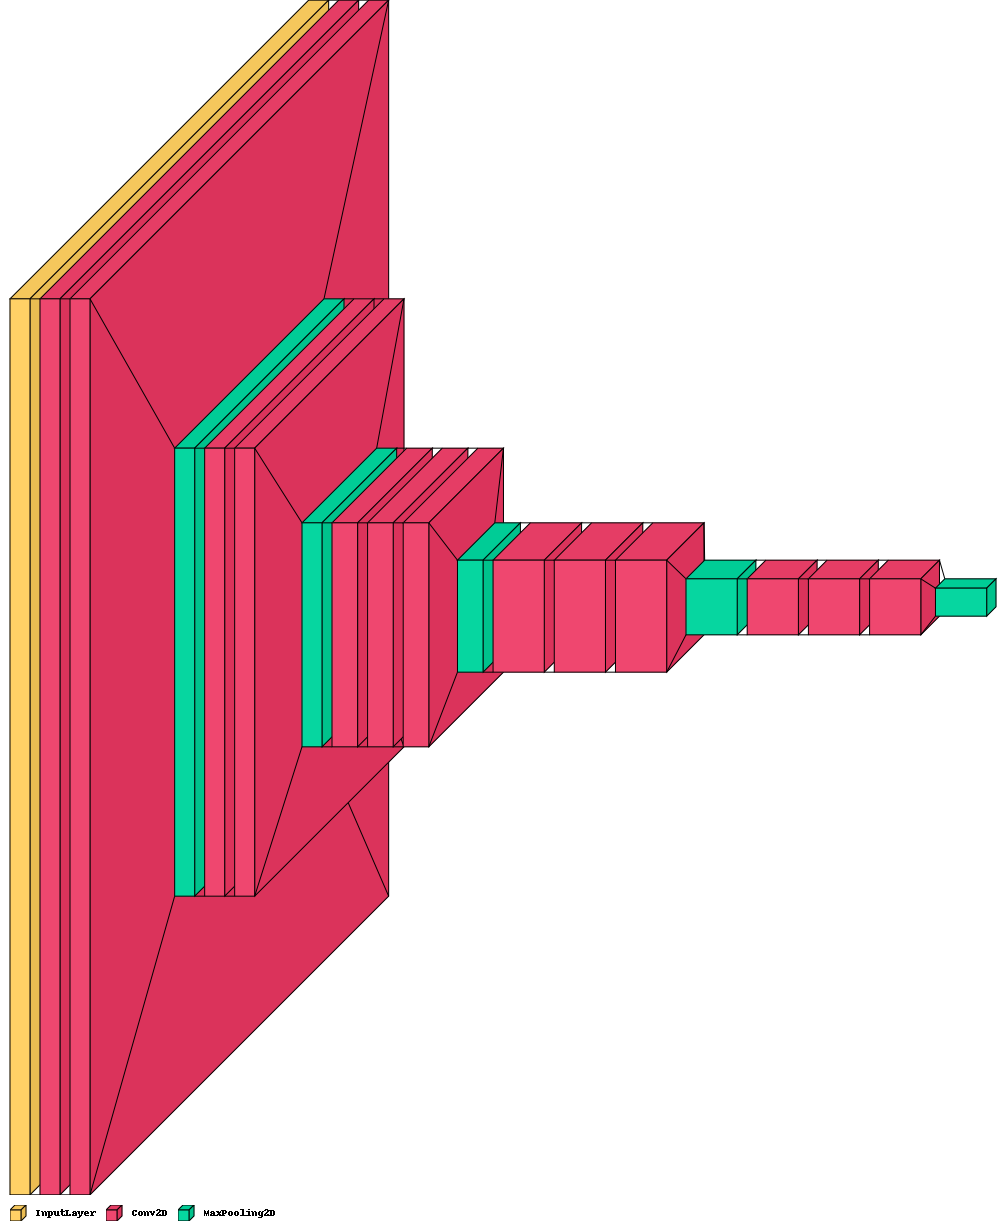

In [8]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(base_model, legend=True) # without custom font

In [9]:

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(50, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

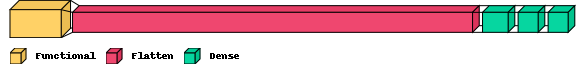

In [10]:
visualkeras.layered_view(model, legend=True) # without custom font

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

hist = model.fit(train_generator, validation_data = test_generator, epochs=25, batch_size=BATCH_SIZE, callbacks=[es])


Epoch 1/25
153/153 [==============================] - 137s 885ms/step - loss: 1.9910 - accuracy: 0.9463 - val_loss: 2.5324 - val_accuracy: 0.9407
Epoch 2/25
153/153 [==============================] - 78s 508ms/step - loss: 0.2875 - accuracy: 0.9821 - val_loss: 1.2057 - val_accuracy: 0.9590
Epoch 3/25
153/153 [==============================] - 77s 505ms/step - loss: 0.1012 - accuracy: 0.9921 - val_loss: 1.5605 - val_accuracy: 0.9617
Epoch 4/25
153/153 [==============================] - 76s 497ms/step - loss: 0.0906 - accuracy: 0.9934 - val_loss: 1.6630 - val_accuracy: 0.9601
Epoch 5/25
153/153 [==============================] - 78s 509ms/step - loss: 0.0795 - accuracy: 0.9945 - val_loss: 1.6493 - val_accuracy: 0.9645
Epoch 6/25
153/153 [==============================] - 77s 503ms/step - loss: 0.1648 - accuracy: 0.9929 - val_loss: 1.2036 - val_accuracy: 0.9661
Epoch 7/25
153/153 [==============================] - 77s 505ms/step - loss: 0.1406 - accuracy: 0.9923 - val_loss: 1.6713 - val_a

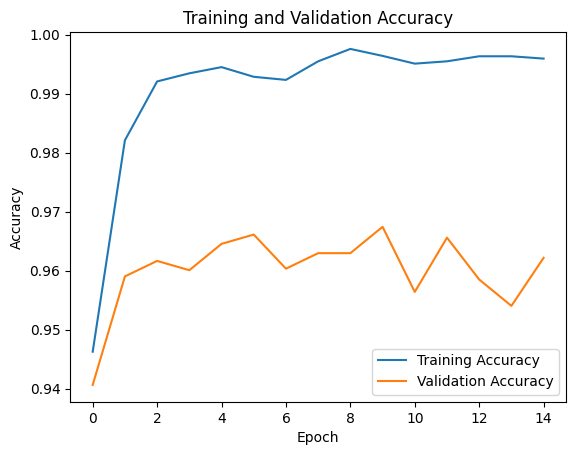

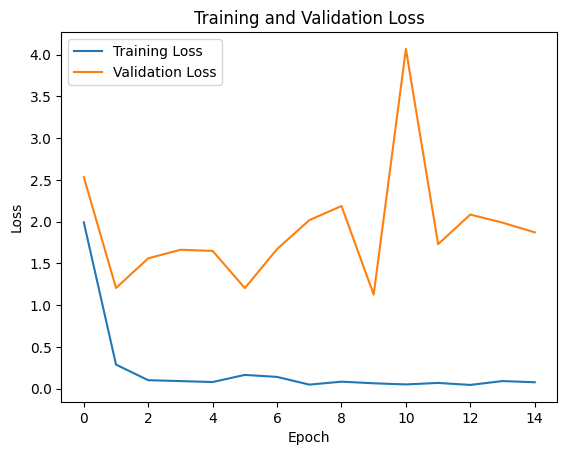

In [13]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model.save('vgg16.keras')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
loss, accuracy = model.evaluate(test_generator)
print("validation accuracy", accuracy)


39/39 [==============================] - 16s 396ms/step - loss: 1.4623 - accuracy: 0.9669
validation accuracy 0.966911792755127


In [26]:
#Confusion Matrix and Classification Report
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Blot', 'CT Scan', 'FACS','Macroscopy','Microscopy','X-rays', 'negative class']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


#Evaluating using Keras model_evaluate:
x, y = zip(*(test_generator[i] for i in range(len(test_generator))))
x_test, y_test = np.vstack(x), np.vstack(y)
loss, acc = model.evaluate(x_test, y_test, batch_size=64)

print("Accuracy: " ,acc)
print("Loss: ", loss)

39/39 [==============================] - 16s 403ms/step
Confusion Matrix
[[ 64  66  67  60  80  70  93]
 [ 86  73  73  65  73  60  66]
 [ 74  69  72  69  81  62  85]
 [ 69  66  91  74  80  79  79]
 [ 70  60  80  77  99  95 120]
 [ 64  70  66  73  85  71  96]
 [ 91  92  89  88  94  82 100]]
Classification Report
                precision    recall  f1-score   support

          Blot       0.12      0.13      0.13       500
       CT Scan       0.15      0.15      0.15       496
          FACS       0.13      0.14      0.14       512
    Macroscopy       0.15      0.14      0.14       538
    Microscopy       0.17      0.16      0.17       601
        X-rays       0.14      0.14      0.14       525
negative class       0.16      0.16      0.16       636

      accuracy                           0.15      3808
     macro avg       0.14      0.14      0.14      3808
  weighted avg       0.15      0.15      0.15      3808

60/60 [==============================] - 7s 122ms/step - loss: 1.552

### Applying same model on watershed images


In [28]:
# Path to the directory containing the images
image_directory = "/kaggle/input/watershed-biomedical-images/watershed class wise images"

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 100

In [29]:
# Create an ImageDataGenerator for training and validation
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory(
    image_directory,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # This is the training set
)

# Create a generator for testing data (which is part of the training data)
test_generator = datagen.flow_from_directory(
    image_directory,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # This is the test set (portion of training data)
)

Found 15245 images belonging to 7 classes.
Found 3808 images belonging to 7 classes.


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

hist = model.fit(train_generator, validation_data = test_generator, epochs=25, batch_size=BATCH_SIZE, callbacks=[es])


Epoch 1/25
153/153 [==============================] - 125s 811ms/step - loss: 0.4443 - accuracy: 0.9690 - val_loss: 1.1861 - val_accuracy: 0.9517
Epoch 2/25
153/153 [==============================] - 79s 514ms/step - loss: 0.1309 - accuracy: 0.9843 - val_loss: 1.2449 - val_accuracy: 0.9433
Epoch 3/25
153/153 [==============================] - 78s 511ms/step - loss: 0.1351 - accuracy: 0.9875 - val_loss: 1.3829 - val_accuracy: 0.9527
Epoch 4/25
153/153 [==============================] - 79s 513ms/step - loss: 0.0796 - accuracy: 0.9920 - val_loss: 0.8141 - val_accuracy: 0.9593
Epoch 5/25
153/153 [==============================] - 78s 508ms/step - loss: 0.0791 - accuracy: 0.9927 - val_loss: 1.4189 - val_accuracy: 0.9598
Epoch 6/25
153/153 [==============================] - 79s 513ms/step - loss: 0.0310 - accuracy: 0.9968 - val_loss: 1.2718 - val_accuracy: 0.9567
Epoch 7/25
153/153 [==============================] - 78s 511ms/step - loss: 0.0684 - accuracy: 0.9950 - val_loss: 1.4418 - val_a

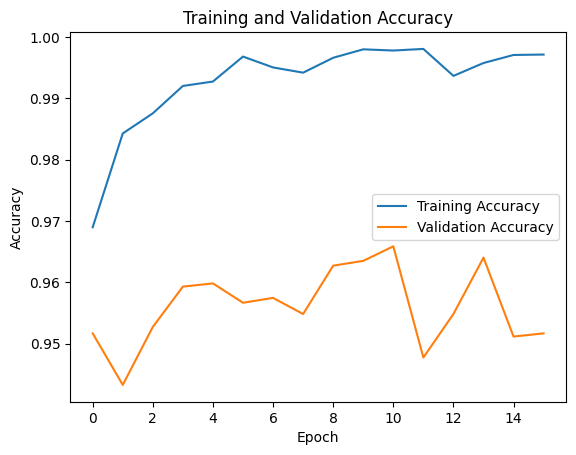

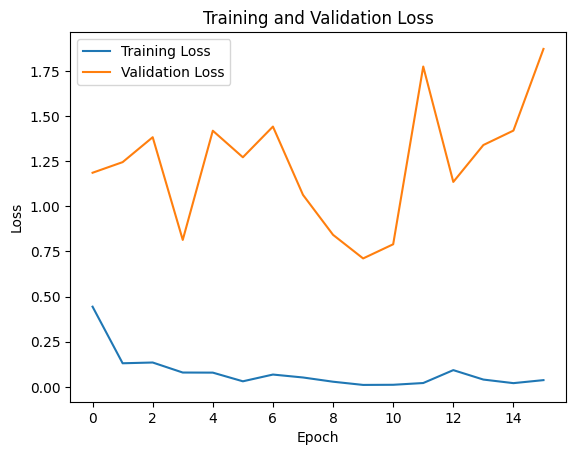

In [32]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions

1/1 [==============================] - 0s 17ms/step


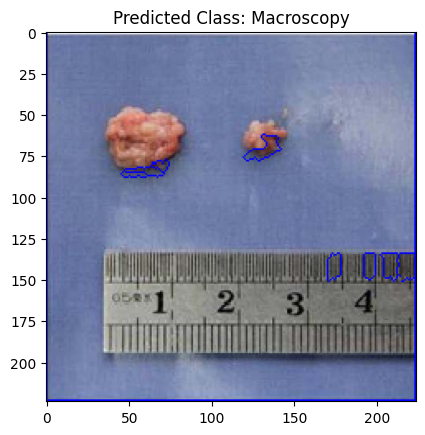

In [42]:
from keras.preprocessing import image
import numpy as np

# Load the image
img = image.load_img("/kaggle/input/watershed-biomedical-images/watershed class wise images/Macroscopy/12588.png", target_size=(224, 224))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)

# Predict the class probabilities
output = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(output)

# Assuming class_indices is a dictionary mapping class indices to class names
class_indices = train_generator.class_indices

# Reverse the dictionary to get a mapping of class names to indices
reverse_class_indices = {v: k for k, v in class_indices.items()}

# Get the predicted class name
predicted_class_name = reverse_class_indices[predicted_class_index]

# Display the image and predicted class name
plt.imshow(img[0])
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()
